In [13]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 크롬 드라이버를 불러옵니다. ChromeDriverManager가 자동으로 최신 드라이버를 다운로드하여 사용합니다.
driver = webdriver.Chrome(ChromeDriverManager().install())

# 롯데시네마 웹사이트의 영화 페이지로 이동합니다.
driver.get('https://www.lottecinema.co.kr/NLCHS/Movie/MovieDetailView?movie=19776')

# 평점 메뉴를 클릭하여 평점 페이지로 이동합니다.
score_menu = driver.find_element_by_xpath('//*[@id="contents"]/ul/li[2]/button/span')
score_menu.click()

# 관람평 페이지에서 리뷰 정보를 수집합니다.
reviews = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'review_info'))
)

for review in reviews:
    print(review.text)

# 드라이버를 종료합니다.
driver.quit()


아름다운 이별의 정석이네요
이전 가오갤 시리즈 보다는 좀 그랬지만 머리 비우고 보는 용도로는 좋아요!
역씌는 역씌! 재미있다 증말
그냥 최고
현 시점에 마블의 희망이 아닐까 싶습니다 정말 최고였습니다 로켓의 가슴 아픈 과거 이야기.. ㅠㅠ
여자친구랑 가서 봤는데 재밌었어요
우주의 가슴아픈 너구리 이야기
아... ㅜㅡ 마블의 마지막 희망이 이렇게 화려하게 피날레를 장식하네요
로켓이가 쏘아올린 작은 공
가오갤의 완벽한 마무리


In [17]:
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = "https://www.lottecinema.co.kr/NLCHS/Movie/MovieDetailView?movie=19776"

# 크롬드라이버 자동 업데이트를 위해 필요한 코드
import chromedriver_autoinstaller
chromedriver_autoinstaller.install()

driver = webdriver.Chrome()
driver.get(url)

# 평점 탭 클릭
driver.find_element(By.XPATH, '//*[@id="contents"]/ul/li[2]/button/span') \
    .click()

# 더보기 버튼 클릭하여 리뷰 추가 로드
num_reviews = 100
wait = WebDriverWait(driver, 10)
while len(driver.find_elements(By.XPATH, '//*[@class="review_info"]')) < num_reviews:
    try:
        wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="btn_review_more"]/span'))) \
            .click()
    except:
        break

# 리뷰 데이터 수집
reviews = driver.find_elements(By.XPATH, '//*[@class="review_info"]')
comment_list = [review.text for review in reviews[:num_reviews]]  # 리뷰를 리스트에 저장

# CSV 파일 생성 및 리뷰 작성
with open("리뷰데이터.csv", "w", newline="", encoding="utf-8-sig") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["리뷰"])

    for comment in comment_list:
        csv_writer.writerow([comment])

driver.quit()


In [7]:
!pip install konlpy wordcloud

In [8]:
comment

['아름다운 이별의 정석이네요',
 '이전 가오갤 시리즈 보다는 좀 그랬지만 머리 비우고 보는 용도로는 좋아요!',
 '역씌는 역씌! 재미있다 증말',
 '그냥 최고',
 '현 시점에 마블의 희망이 아닐까 싶습니다 정말 최고였습니다 로켓의 가슴 아픈 과거 이야기.. ㅠㅠ',
 '여자친구랑 가서 봤는데 재밌었어요',
 '우주의 가슴아픈 너구리 이야기',
 '아... ㅜㅡ 마블의 마지막 희망이 이렇게 화려하게 피날레를 장식하네요',
 '로켓이가 쏘아올린 작은 공',
 '가오갤의 완벽한 마무리',
 '너무 재밌어요. 아들이 더좋아하네요',
 '마블이 마블했다 가족영화다 바로 이게!!!',
 '우리가 마블에게 기대한 모든 것. 앞으로는 이런 만족감을 다시 느낄 수 없을 것 같아 씁쓸하다.',
 '안녕 가오갤~',
 '가오갤3 재미나게 관람했네요',
 '진짜 진짜 유쾌한 영화^^ 강추합니다',
 '♡♡♡♡♡♡♡♡♡♡♡♡',
 '마블중에 그나마 젤 괜찮은 가오갤',
 '굿바이 가오갤~~ㅠㅠ',
 '재밌게 봤어 요',
 '가다언주오부걀록사가',
 '마블 최고의 영화입니다 또 보고싶네요',
 '사람이 제일 나빠.... 로켓 건강하고 행복하자 역시 가오갤!',
 '마알못인 친구랑 봤는데 몰라도 감동이고 재밌더라고여!!',
 '동물친구들 천국에서 행복하길...',
 '슬프지만 재미있어요',
 '영화 뭐 볼지 망설이고 있다면 마블을 좋아하는 사람이든 아니든 추천합니다. 후회하진 않을 거에요.',
 '함정인줄 알고 가면 함정이 아니고 대결이지~!',
 '최고~~~~',
 '시리즈 최고의 영화 마무리진짜잘함']

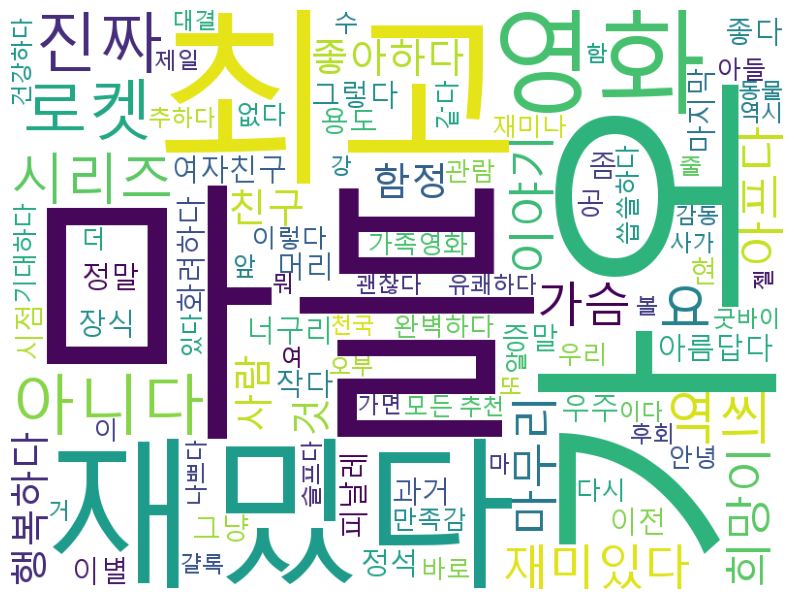

In [10]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 형태소 분석기 생성
okt = Okt()

# 형태소 분석 후 명사와 형용사만 추출하여 리스트로 저장
# 형태소 분석 후 명사와 형용사만 추출하여 리스트로 저장
words = []
for sentence in comment:
    pos = okt.pos(sentence, norm=True, stem=True)
    words.extend([word for word, tag in pos if tag in ['Noun', 'Adjective'] and word is not None])


# 추출한 단어로부터 단어 빈도수 계산
count = Counter(words)
tags = count.most_common(100)

# 'None' 제거
tags = [(word, freq) for word, freq in tags if word is not None]

# 워드클라우드 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      width=800, 
                      height=600).generate_from_frequencies(dict(tags))

# 워드클라우드 이미지 출력
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [21]:
!pip install chromedriver_autoinstaller

In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = webdriver.Chrome(executable_path=r"C:\Users\1\chrome\chromedriver.exe")

# 웹 페이지로 이동
url = 'https://www.lottecinema.co.kr/NLCHS/Movie/MovieDetailView?movie=19775'
driver.get(url)

# 웹 페이지로 이동
url = 'https://www.lottecinema.co.kr/NLCHS/Movie/MovieDetailView?movie=19775'
driver.get(url)

print("페이지 로딩 중...")
WebDriverWait(driver, 60).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
print("페이지 로딩 완료")

print("리뷰 정보 가져오는 중...")
review_elements = driver.find_elements(By.XPATH, '//*[@class="review_info"]')
print("리뷰 정보 가져오기 완료")

print("가져온 리뷰 정보:")
for element in review_elements:
    print(element.text)

# 브라우저 닫기
driver.quit()

페이지 로딩 중...
페이지 로딩 완료
리뷰 정보 가져오는 중...
리뷰 정보 가져오기 완료
가져온 리뷰 정보:


In [29]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# 웹 드라이버 옵션 설정
chrome_options = Options()
# 다운로드 경로 설정
chrome_options.add_argument("download.default_directory=/path/to/download/directory")

# Chrome 브라우저를 사용하여 WebDriver 객체 생성
driver = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_options)

# 웹 페이지로 이동
url = 'https://www.lottecinema.co.kr/NLCHS/Movie/MovieDetailView?movie=19775'
driver.get(url)

# 페이지 소스 가져오기
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')

driver.find_element(By.XPATH, '//*[@id="contents"]/ul/li[2]/button/span') \
    .click()

num_reviews = 100
wait = WebDriverWait(driver, 10)
while len(driver.find_elements(By.XPATH, '//*[@class="review_info"]')) < num_reviews:
    try:
        wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="btn_review_more"]/span'))) \
            .click()
    except:
        break

# div 태그의 내용을 리스트에 저장
for div_element in div_elements:
    review_contents.append(div_element.get_text(strip=True))

print(review_contents)

driver.quit()


['에니메이션인줄 모르고~~\n정신만 없었슴', '정ㅅㄴ없고 별로', '잘보고갑니다', '난장판이고 별로', '요즘 세대에 꼭 봐야만 할 영상물입니다.\n강추~~', '시간이 진짜 빨리가요 영상미 스토리 모두 감동이에요', '화려한 액션 영상미 근데 1편이 더 재밌음', '시원시원한 액션 볼만합니다', '재밌어요.\n긴시간이 지루하지 않네요', '머리아픈영화 그만해 멀티버스', '에니메이션인줄 모르고~~\n정신만 없었슴', '정ㅅㄴ없고 별로', '잘보고갑니다', '난장판이고 별로', '요즘 세대에 꼭 봐야만 할 영상물입니다.\n강추~~', '시간이 진짜 빨리가요 영상미 스토리 모두 감동이에요', '화려한 액션 영상미 근데 1편이 더 재밌음', '시원시원한 액션 볼만합니다', '재밌어요.\n긴시간이 지루하지 않네요', '머리아픈영화 그만해 멀티버스']
